1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt("http://www.scipy-lectures.org/_downloads/populations.txt")

Plot the populations for the years in the period. Add legend and axis labels to the plot.

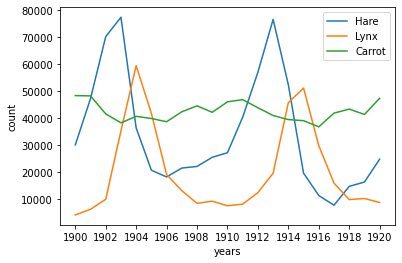

In [ ]:
years = data[:, 0]
plt.plot(years, data[:, 1], label= "Hare")
plt.plot(years, data[:, 2], label= "Lynx")
plt.plot(years, data[:, 3], label= "Carrot")
plt.legend()
plt.xticks(years[years % 2 == 0])
plt.xlabel('years')
plt.ylabel('count')
plt.show()

Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

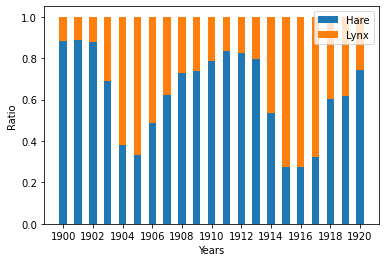

In [ ]:
n = np.sum(data[:,[1,2]], axis = 1)
plt.bar(years, data[0:,1] / n, width = 0.5, label ="Hare") 
plt.bar(years, data[0:,2] / n, bottom = data[0:,1] / n, width = 0.5, label ="Lynx") 

plt.xticks(years[years % 2 == 0])
plt.xlabel("Years")
plt.ylabel("Ratio")
plt.legend()
plt.show()

Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

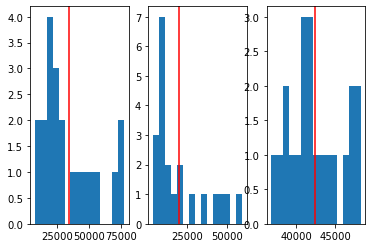

Hare std:  21842.706100051855
Lynx std:  14677.61427459009
Carrot std:  20380.862767381983


In [3]:
fig, ax = plt.subplots(1,3)
ax[0].hist(data[:,1], bins = 15)
ax[0].axvline(data[:,1].mean(), c = 'r')

ax[1].hist(data[:,2], bins = 15)
ax[1].axvline(data[:,2].mean(), c = 'r')

ax[2].hist(data[:,3], bins = 15)
ax[2].axvline(data[:,3].mean(), c = 'r')
plt.show()
print("Hare std: ", np.std(data[:,[0,1]]))
print("Lynx std: ", np.std(data[:,[0,2]]))
print("Carrot std: ", np.std(data[:,[0,3]]))

Find which year each species had the largest population. Mark these years in the plot of populations.

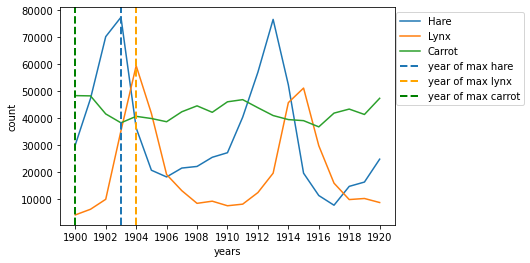

In [ ]:
years = data[:, 0]
plt.plot(years, data[:, 1], label= "Hare")
plt.plot(years, data[:, 2], label= "Lynx")
plt.plot(years, data[:, 3], label= "Carrot")
plt.xticks(years[years % 2 == 0])
plt.xlabel('years')
plt.ylabel('count')
max_years = years[(np.argmax(data[:,[1,2,3]], axis = 0))]
plt.axvline(x=(max_years[0]), linestyle="--", linewidth=2, label= "year of max hare")
plt.axvline(x=(max_years[1]), color='orange', linestyle="--", linewidth=2, label= "year of max lynx")
plt.axvline(x=(max_years[2]), color='g', linestyle="--", linewidth=2, label= "year of max carrot")
plt.legend(bbox_to_anchor=(1.4, 1))
plt.show()

Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


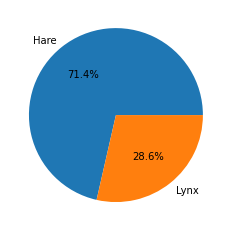

In [ ]:
res = ['H', 'L']
values = np.argmax(data[:,[1,2]], axis = 1)
labels = ["Hare", "Lynx"]
plt.pie(np.bincount(values), labels=labels, autopct='%1.1f%%')
print(np.asarray(res)[values])

Find which years any of the populations is above 50000. Show time periods where populations are above 50000 in the plot of populations.

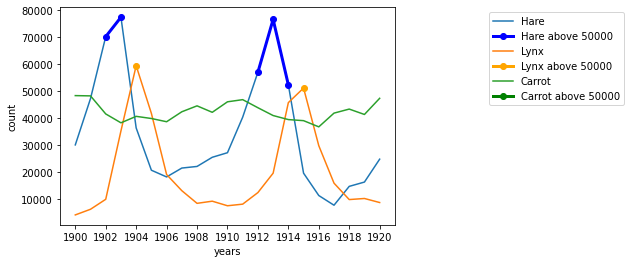

Hare above 50k: [1902. 1903. 1912. 1913. 1914.]
Lynx above 50k: [1904. 1915.]
Carrot above 50k: []


In [ ]:
years = data[:, 0]
hr = np.ma.masked_where(data[:, 1] <= 50000, data[:, 1])
lnx = np.ma.masked_where(data[:, 2] <= 50000, data[:, 2])
crrt = np.ma.masked_where(data[:, 3] <= 50000, data[:, 3])
plt.plot(years, data[:, 1], label= "Hare")
plt.plot(years, hr, 'g-o', label= "Hare above 50000", linewidth = 3, c ='b')
plt.plot(years, data[:, 2], label= "Lynx")
plt.plot(years, lnx,'g-o', label= "Lynx above 50000", linewidth = 3, c ='orange')
plt.plot(years, data[:, 3], label= "Carrot")
plt.plot(years, crrt, 'g-o',label= "Carrot above 50000", linewidth = 3, c ='g')
plt.legend(bbox_to_anchor=(1.7, 1))
plt.xticks(years[years % 2 == 0])

plt.xlabel('years')
plt.ylabel('count')
plt.show()
print('Hare above 50k:', years[hr.mask == False])
print('Lynx above 50k:', years[lnx.mask == False])
print('Carrot above 50k:', years[crrt.mask == False])

Find the top 2 years for each species when they had the lowest populations.

In [ ]:
print("Years of hare top 2 lowest populations: ",(np.asarray(sorted(data[:,[0,1]], key=lambda x: x[1]))[:,0])[0:2])
print("Years of lynx top 2 lowest populations: ",(np.asarray(sorted(data[:,[0,2]], key=lambda x: x[1]))[:,0])[0:2])
print("Years of carr top 2 lowest populations: ",(np.asarray(sorted(data[:,[0,3]], key=lambda x: x[1]))[:,0])[0:2])

Years of hare top 2 lowest populations:  [1917. 1916.]
Years of lynx top 2 lowest populations:  [1900. 1901.]
Years of carr top 2 lowest populations:  [1916. 1903.]


Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

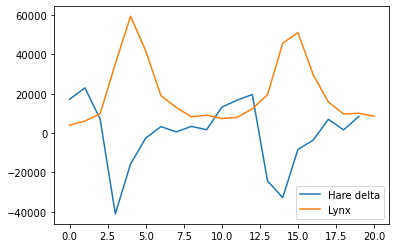

correlation coefficient: 
 [[ 1.         -0.69334852]
 [-0.69334852  1.        ]]


In [ ]:
plt.plot(np.diff(data[:,1]), label = 'Hare delta')
plt.plot(data[:,2], label = 'Lynx')
plt.legend()
plt.show()
print('correlation coefficient: \n', np.corrcoef(np.diff(data[:,1]), data[:-1,2]))

Show population of hares vs carrots and hares vs lynxes.

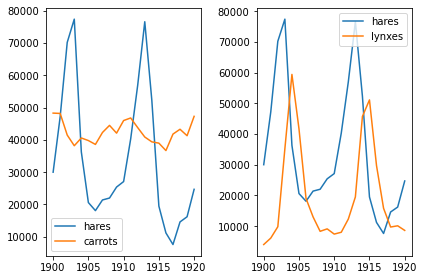

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].plot(years, data[:,1], label = 'hares')
ax[0].plot(years, data[:,3], label = 'carrots')
ax[1].plot(years, data[:,1], label = 'hares')
ax[1].plot(years, data[:,2], label = 'lynxes')
ax[0].legend()
ax[1].legend()
fig.tight_layout()
plt.show()

Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value with the true value and print a ratio of the error to the true value.

In [16]:
diffmean = np.mean(np.diff(data[:-1,1]) - data[:-2,2])
hares1920 = data[-2,1] - data[-1,2] - diffmean
print('Hares at 1920:', hares1920)
print('error ratio:', (hares1920 - data[-1,1])/ data[-1,1])

Hares at 1920: 29631.57894736842
error ratio: 0.19965906669507774


2. Plot a graph of total explained variance vs number of principal components.

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
digits = fetch_openml('mnist_784')


In [40]:
ratio = np.empty(35)
for i in range(5,35):
    pca = PCA(n_components = 10 * i)
    X_transformed = pca.fit_transform(digits.data.astype(float))
    ratio[i] = np.sum(pca.explained_variance_ratio_)
print(ratio[5:])

[0.825388   0.85322606 0.87448721 0.8907018  0.90397958 0.91452551
 0.92354872 0.93105286 0.93755669 0.94324101 0.94818873 0.95258777
 0.95646609 0.95998287 0.96315401 0.96617242 0.96883585 0.97138074
 0.97367736 0.97582754 0.97785844 0.97971662 0.98146185 0.98309492
 0.98464555 0.98604834 0.98735425 0.98860584 0.98976057 0.99084861]


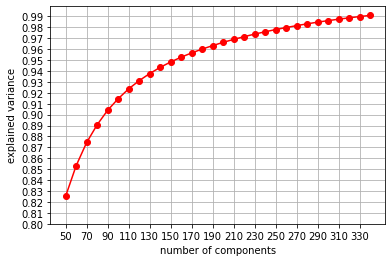

In [44]:
plt.plot(np.arange(50, 350, 10), ratio[5:], 'o-r')
plt.xticks(np.arange(50, 350, 20))
plt.yticks(np.arange(0.8, 1., 0.01))
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.grid(True)
plt.show()

3. Find a number of principal components for 99%, 95%, 90%, and 85% of explained variance.

99% - 340 компонент
95% - 160 компонент
90% - 90 компонент
85% - 60 компонент

4. Plot an original image and restored images from 99%, 95%, 90%, and 85% of explained variance

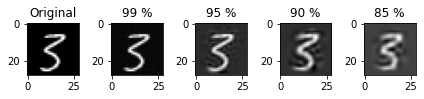

In [46]:
k = 540
image = digits.data[k].reshape(28, 28)
fig, ax = plt.subplots(1, 5)
comp = [340, 160, 90, 60]
rt = [99, 95, 90, 85]
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
for i in range(len(comp)):
    pca = PCA(n_components = comp[i])
    X_transformed = pca.fit_transform(digits.data.astype(float))
    X_restored = pca.inverse_transform(X_transformed[k])
    ax[i + 1].imshow(X_restored.reshape(28, 28), cmap='gray')
    ax[i + 1].set_title(str(rt[i]) + ' %')
    fig.tight_layout()
plt.show()